In [32]:
# Handwritten Number Recognition Using CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.datasets import mnist
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_image, train_target_column), (test_image, test_target_column) = mnist.load_data()

In [3]:
# 圖片轉四維 (60000為圖片，大小為28X28，1表示單色)
train_image_four_dimension = train_image.reshape(60000,28,28,1).astype('float32')
test_image_four_dimension = test_image.reshape(10000,28,28,1).astype('float32')

In [4]:
# 標準化，以利提升計算效率
train_image_normalized = train_image_four_dimension / 255
test_image_normalized = test_image_four_dimension / 255

In [5]:
# 將目標欄位轉為one hot encoder
train_one_hot = np_utils.to_categorical(train_target_column)
test_one_hot = np_utils.to_categorical(test_target_column)

In [14]:
# 建立CNN模型
CNN = Sequential()
CNN.add(Conv2D(filters = 16, kernel_size = (5, 5), padding='same', activation = 'relu', input_shape = (28, 28, 1)))
CNN.add(MaxPooling2D(pool_size = (2, 2)))

CNN.add(Conv2D(filters = 36, kernel_size = (5, 5), padding='same', activation = 'relu'))
CNN.add(MaxPooling2D(pool_size = (2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Flatten())

CNN.add(Dense(units = 128, activation = 'relu'))

CNN.add(Dropout(0.5))

CNN.add(Dense(units = 10, activation = 'softmax'))



In [15]:
CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               225920    
__________

In [17]:
CNN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
CNN.fit(train_image_normalized, train_one_hot, validation_split=0.2, epochs=15, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 63s - loss: 0.4751 - acc: 0.8509 - val_loss: 0.0981 - val_acc: 0.9700
Epoch 2/15
 - 66s - loss: 0.1351 - acc: 0.9605 - val_loss: 0.0661 - val_acc: 0.9803
Epoch 3/15
 - 70s - loss: 0.1034 - acc: 0.9686 - val_loss: 0.0584 - val_acc: 0.9820
Epoch 4/15
 - 65s - loss: 0.0842 - acc: 0.9753 - val_loss: 0.0520 - val_acc: 0.9831
Epoch 5/15
 - 56s - loss: 0.0693 - acc: 0.9791 - val_loss: 0.0481 - val_acc: 0.9853
Epoch 6/15
 - 53s - loss: 0.0640 - acc: 0.9805 - val_loss: 0.0404 - val_acc: 0.9883
Epoch 7/15
 - 52s - loss: 0.0554 - acc: 0.9835 - val_loss: 0.0375 - val_acc: 0.9895
Epoch 8/15
 - 52s - loss: 0.0515 - acc: 0.9851 - val_loss: 0.0355 - val_acc: 0.9898
Epoch 9/15
 - 48s - loss: 0.0454 - acc: 0.9861 - val_loss: 0.0370 - val_acc: 0.9898
Epoch 10/15
 - 58s - loss: 0.0400 - acc: 0.9879 - val_loss: 0.0342 - val_acc: 0.9910
Epoch 11/15
 - 57s - loss: 0.0391 - acc: 0.9879 - val_loss: 0.0336 - val_acc: 0.9900
Epoch 12/15
 - 64s - los

In [19]:
accuracy = CNN.evaluate(test_image_normalized, test_one_hot)
print('預測精準度:', accuracy[1]*100, '%')

10000/10000 [==============================] - 4s 431us/step
預測精準度: 99.26 %


In [21]:
prediction = CNN.predict_classes(test_image_normalized)

10000/10000 [==============================] - 4s 424us/step


In [22]:
# 使用混淆矩陣查看預測正確與錯誤的數字
cm = confusion_matrix(test_target_column, prediction)
cm

array([[ 974,    0,    0,    0,    0,    0,    3,    0,    2,    1],
       [   1, 1132,    1,    0,    0,    0,    1,    0,    0,    0],
       [   1,    0, 1027,    0,    0,    0,    0,    3,    1,    0],
       [   0,    0,    0, 1007,    0,    1,    0,    0,    2,    0],
       [   0,    0,    0,    0,  974,    0,    0,    0,    2,    6],
       [   1,    0,    0,    5,    0,  884,    1,    0,    0,    1],
       [   4,    2,    0,    0,    1,    1,  949,    0,    1,    0],
       [   0,    2,    4,    1,    0,    0,    0, 1016,    1,    4],
       [   2,    0,    2,    1,    0,    1,    0,    1,  964,    3],
       [   0,    1,    1,    0,    4,    3,    0,    1,    0,  999]],
      dtype=int64)

In [28]:
# 隨意抽取預測錯誤的圖片查看，由上可知，實際值為8、預測為2的數量有2個
df = pd.DataFrame({'actual value': test_target_column, 'predicted value': prediction})
df[(df['actual value']==8) & (df['predicted value']==2)]

,actual value,predicted value
582,8,2
6625,8,2


In [29]:
# 隨意抽取預測錯誤的圖片查看，由上可知，實際值為4、預測為9的數量有個
df = pd.DataFrame({'actual value': test_target_column, 'predicted value': prediction})
df[(df['actual value']==4) & (df['predicted value']==9)]

,actual value,predicted value
115,4,9
740,4,9
2130,4,9
4860,4,9
8527,4,9
9792,4,9


In [24]:
# 繪製圖形
def plot_images(images, labels, prediction, idx, num = 1):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    
    if num>25:
        num=25 
    
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label = " + str(labels[idx])

        if len(prediction) > 0:
            title+=", predict = " + str(prediction[idx])
        
        ax.set_title(title, fontsize = 10) 
        ax.set_xticks([])
        ax.set_yticks([])        
        idx+=1 
    
    plt.show()

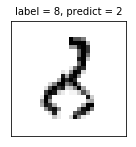

In [26]:
# 顯示預測錯誤的數字，實際是2，預測為0，由圖片可得知，字跡較潦草，確實辨別不易
plot_images(test_image, test_target_column, prediction, idx=582)

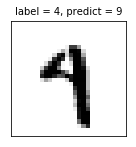

In [31]:
# 預測錯誤的數字，實際是5，預測為3，由圖片可得知，字跡較潦草，確實辨別不易
plot_images(test_image, test_target_column, prediction, idx=740)

# 結論：
    先前用MLP進行手寫辨識，預測精準度：97.69%；本次透過CNN進行預測，精準度再提升至99.26%。
    隨意抽取幾個辨識錯誤的數字如上圖，確實連人類也難以判斷。